# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Train Dataset

In [2]:
train = pd.read_pickle("train.pkl")
train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2,4,sep,wed,87.9,84.8,725.1,3.7,21.8,34,2.2,0.0,6.04
1,6,5,sep,sat,91.2,94.3,744.4,8.4,15.4,57,4.9,0.0,39.35
2,3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
3,2,5,sep,tue,91.0,129.5,692.6,7.0,17.6,46,3.1,0.0,7.04
4,2,2,aug,thu,93.0,75.3,466.6,7.7,18.8,35,4.9,0.0,0.00


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 13 columns):
X        350 non-null int64
Y        350 non-null int64
month    350 non-null object
day      350 non-null object
FFMC     350 non-null float64
DMC      350 non-null float64
DC       350 non-null float64
ISI      350 non-null float64
temp     350 non-null float64
RH       350 non-null int64
wind     350 non-null float64
rain     350 non-null float64
area     350 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 35.7+ KB


In [4]:
train.describe(include='all')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,350.000000,350.000000,350,350,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,sep,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,121,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.668571,4.277143,NaN,NaN,90.576571,111.638286,551.670000,8.862857,18.787429,44.620000,4.103429,0.031429,14.543114
std,2.344019,1.248629,NaN,NaN,5.720943,64.465983,243.882733,4.582706,5.701140,16.835668,1.895278,0.359298,74.182373
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,4.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,69.975000,431.425000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,4.500000,4.000000,NaN,NaN,91.600000,108.350000,666.150000,8.400000,19.450000,42.000000,4.000000,0.000000,0.695000
75%,7.000000,5.000000,NaN,NaN,92.800000,142.400000,714.800000,10.600000,22.400000,54.000000,5.400000,0.000000,7.205000


In [5]:
train.shape

(350, 13)

# Encoding Data

In [6]:
# Encode Data
train.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
train.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [7]:
train.head(30)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2,4,9,3,87.9,84.8,725.1,3.7,21.8,34,2.2,0.0,6.04
1,6,5,9,6,91.2,94.3,744.4,8.4,15.4,57,4.9,0.0,39.35
2,3,4,8,2,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
3,2,5,9,2,91.0,129.5,692.6,7.0,17.6,46,3.1,0.0,7.04
4,2,2,8,4,93.0,75.3,466.6,7.7,18.8,35,4.9,0.0,0.00
5,5,4,9,5,92.1,99.0,745.3,9.6,12.8,64,3.6,0.0,1.64
6,6,3,9,2,90.3,80.7,730.2,6.3,18.2,62,4.5,0.0,0.00
7,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
8,3,4,9,7,90.5,96.7,750.5,11.4,20.6,55,5.4,0.0,24.59
9,8,6,8,3,93.1,157.3,666.7,13.5,28.7,28,2.7,0.0,0.00


# Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

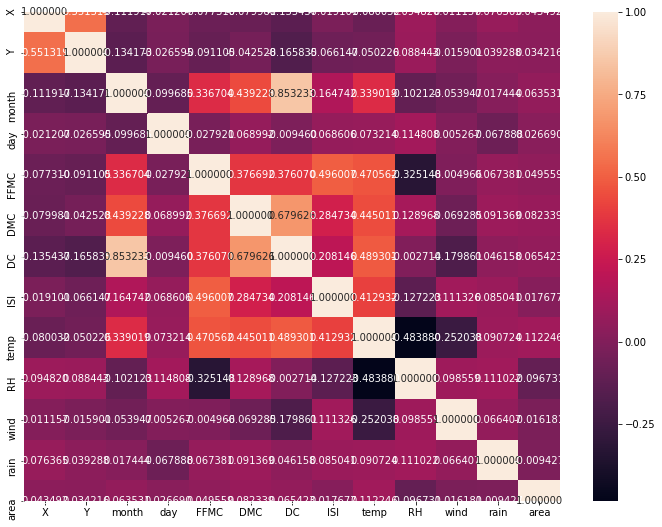

In [9]:
corrmat=train.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat, annot=True, fmt="f")
#sns.heatmap(corrmat,vmax=.9,square=True)
plt.show()

(array([344.,   4.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

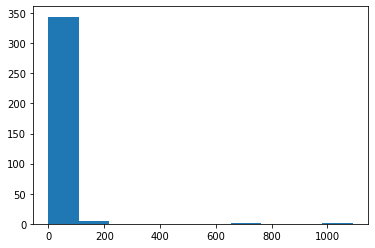

In [10]:
plt.hist((train.area))

Most of the dataset's samples fall between 0 and 200 of 'Area' output class, with majority being less than 100

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0ed6ebf50>,
      dtype=object)

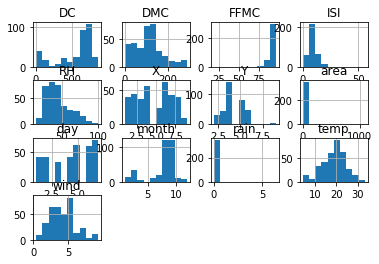

In [11]:
train.hist()

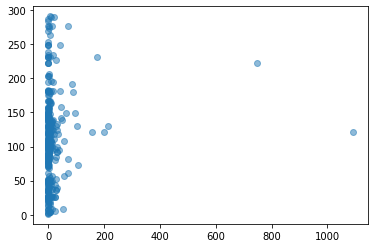

In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801)



x = train['area']
y = train['DMC']

area = (30 * np.random.rand(10))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=.5)
plt.show()

# Train Test and Split

In [13]:
train=train[train['area']<25]

In [14]:
col=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind']
target='area'

In [15]:
train=train[train['FFMC']>75]

In [16]:
from sklearn.model_selection import train_test_split
#training set
train_set=train.sample(frac=0.8,random_state=1)
#test set
test_set=train.loc[~train.index.isin(train_set.index)]
print(train_set.shape)
print(test_set.shape)

(247, 13)
(62, 13)


# RandomForestRegressor

In [17]:
from sklearn.ensemble import RandomForestRegressor



model = RandomForestRegressor(n_estimators=13,random_state=4)
model.fit(train_set[col],train_set[target])
predictions = model.predict(test_set[col])

In [18]:
model.fit(train[col],train[target]) 


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=13,
                      n_jobs=None, oob_score=False, random_state=4, verbose=0,
                      warm_start=False)

# Test dataset

In [19]:
testX = pd.read_pickle("testX.pkl")
testX.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
350,1,2,sep,thu,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0
351,2,4,aug,sun,91.6,181.3,613.0,7.6,20.9,50,2.2,0.0
352,2,2,aug,tue,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0
353,7,5,sep,tue,91.0,129.5,692.6,7.0,20.7,37,2.2,0.0
354,7,4,sep,fri,88.2,55.2,732.3,11.6,15.2,64,3.1,0.0


In [20]:
testX.shape

(167, 12)

# Prediction

In [21]:
new_list = []
for item in predictions:
    new_list.append(item)

In [22]:
print(new_list)

[3.1076923076923078, 0.26153846153846155, 4.093076923076923, 2.1684615384615387, 2.0092307692307694, 1.8223076923076924, 6.186153846153847, 11.001128205128206, 7.096153846153846, 10.252307692307692, 3.572692307692308, 17.234946886446885, 2.5653846153846156, 4.021538461538461, 0.1546153846153846, 0.49461538461538457, 3.9400000000000004, 2.221538461538462, 1.716923076923077, 3.1076923076923078, 2.968461538461538, 1.2623076923076924, 10.794358974358971, 0.8415384615384615, 2.589230769230769, 8.28, 0.7238461538461538, 6.880769230769231, 0.16999999999999998, 2.220769230769231, 5.295384615384616, 3.1630769230769236, 3.1630769230769236, 2.976153846153846, 8.358461538461537, 0.28, 0.39999999999999997, 2.0553846153846154, 8.477692307692307, 0.7123076923076923, 3.727692307692308, 8.919230769230769, 1.390769230769231, 5.551538461538461, 0.4269230769230769, 2.3219230769230768, 1.5199999999999998, 3.3207692307692307, 4.340769230769231, 2.5953846153846154, 2.9061538461538463, 5.136923076923077, 8.79

In [23]:
predictions=model.predict(testX[col])

In [24]:
testX['area'] = predictions

In [25]:
testX.head(30)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
350,1,2,sep,thu,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0,3.474615
351,2,4,aug,sun,91.6,181.3,613.0,7.6,20.9,50,2.2,0.0,2.431538
352,2,2,aug,tue,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,1.990769
353,7,5,sep,tue,91.0,129.5,692.6,7.0,20.7,37,2.2,0.0,1.981538
354,7,4,sep,fri,88.2,55.2,732.3,11.6,15.2,64,3.1,0.0,6.227692
355,7,4,aug,sat,91.8,170.9,692.3,13.7,23.7,40,1.8,0.0,2.978462
356,4,4,sep,sun,89.7,90.0,704.4,4.8,17.8,64,1.3,0.0,2.107692
357,6,6,aug,mon,96.2,175.5,661.8,16.8,23.9,42,2.2,0.0,7.420769
358,2,5,aug,sun,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,4.086154
359,9,9,aug,fri,94.8,227.0,706.7,12.0,25.0,36,4.0,0.0,1.255385


In [26]:
testY = testX

# My saved Prediction Result

In [27]:
pd.DataFrame(testY).to_pickle("your-preds-task3.pkl")

# My PART (Teacher will do this)

In [28]:
# I load your predictions

yours = pd.read_pickle("your-preds-task3.pkl")
yours.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
350,1,2,sep,thu,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0,3.474615
351,2,4,aug,sun,91.6,181.3,613.0,7.6,20.9,50,2.2,0.0,2.431538
352,2,2,aug,tue,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,1.990769
353,7,5,sep,tue,91.0,129.5,692.6,7.0,20.7,37,2.2,0.0,1.981538
354,7,4,sep,fri,88.2,55.2,732.3,11.6,15.2,64,3.1,0.0,6.227692


In [29]:
yours

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
350,1,2,sep,thu,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0,3.474615
351,2,4,aug,sun,91.6,181.3,613.0,7.6,20.9,50,2.2,0.0,2.431538
352,2,2,aug,tue,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,1.990769
353,7,5,sep,tue,91.0,129.5,692.6,7.0,20.7,37,2.2,0.0,1.981538
354,7,4,sep,fri,88.2,55.2,732.3,11.6,15.2,64,3.1,0.0,6.227692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,5,5,aug,sun,94.0,47.9,100.7,10.7,17.3,80,4.5,0.0,6.262692
513,6,5,feb,mon,84.1,4.6,46.7,2.2,5.3,68,1.8,0.0,5.806154
514,4,5,sep,fri,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,0.817692
515,7,4,sep,mon,90.9,126.5,686.5,7.0,19.4,48,1.3,0.0,3.211731


In [30]:
real= pd.read_pickle("testY.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'testY.pkl'

In [ ]:
real

In [ ]:
import numpy as np

In [ ]:
your_MSE=np.sqrt(sum([e**2 for e in real-yours]))

In [ ]:
your_MSE